<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Assignment_Sampath_Kumar_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2]:
# Your Work Here
# do imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# specify plot size
plt.style.use ('fast')

In [3]:
## check what plots are available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Do some vizualisation with pandas inbuilt utilities

In [6]:
## Read titanic dataset

file = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv (file)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [8]:
## check continuous vs categorical variables

## lets introduce a new categorical variable called as cabin class

df['Cabin class'] = df['Pclass'].map ({1:'First', 2: 'Second', 3: 'Third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin class
0,0,3,male,22.0,7.2500,Southampton,Third
1,1,1,female,38.0,71.2833,Cherbourg,First
2,1,3,female,26.0,7.9250,Southampton,Third
3,1,1,female,35.0,53.1000,Southampton,First
4,0,3,male,35.0,8.0500,Southampton,Third


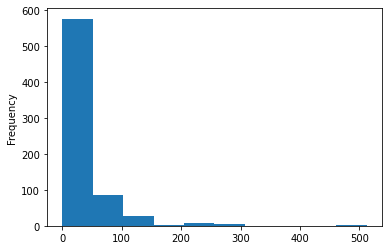

In [11]:
## Fare is a continuous variable, lets do a historgram with it

df['Fare'].plot(kind ='hist');

In [13]:
# convert continuous var to categorical var by binning

farebins = [0,8, 15, 33, 512]
farelabel = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut (df['Fare'], bins =farebins, labels=farelabel)
faregroup_list = df['fare_groups'].value_counts().sort_index()
faregroup_list

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

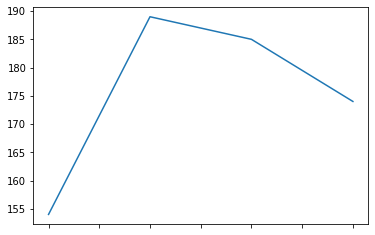

In [15]:
faregroup_list.plot();

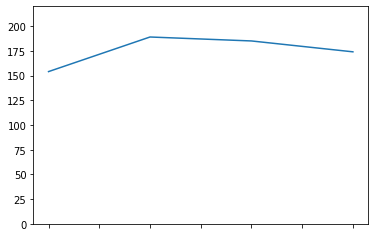

In [17]:
## let's set some limit
faregroup_list.plot(ylim=(0,220));

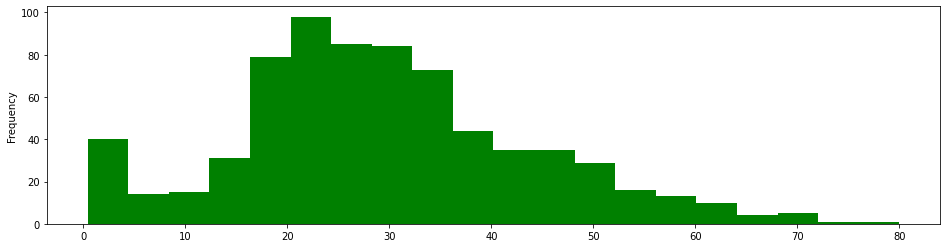

In [24]:
## Displaying single continuous variable
df['Age'].plot( kind='hist', figsize=(16,4), color='green' , bins=20);

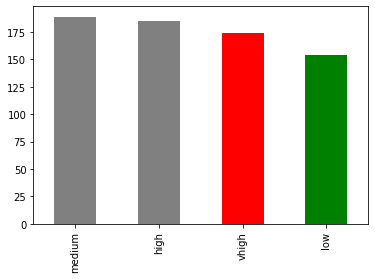

In [27]:
# display single categorical variable

## use bar charts
df['fare_groups'].value_counts().plot (kind='bar', color =['gray', 'gray', 'red', 'green']);


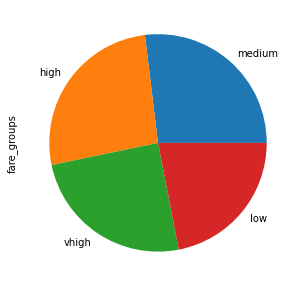

In [30]:
## Now do a pie chart
df['fare_groups'].value_counts().plot (kind='pie', figsize=[5,5]);

In [32]:
## compare two categorical variables

ct_deaths = pd.crosstab (df['Cabin class'], df['Survived'])

ct_deaths

Survived,0,1
Cabin class,,
First,64,120
Second,90,83
Third,270,85


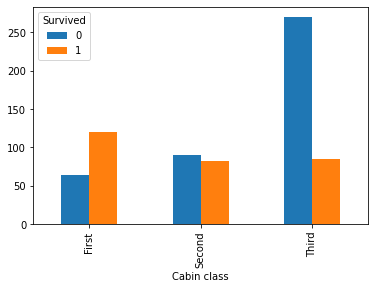

In [35]:
## Do a graph
ct_deaths.plot(kind='bar');

In [38]:
## crosstab with percents

ct_deaths = pd.crosstab (df['Cabin class'], df['Survived'], normalize='columns')

ct_deaths

Survived,0,1
Cabin class,,
First,0.150943,0.416667
Second,0.212264,0.288194
Third,0.636792,0.295139


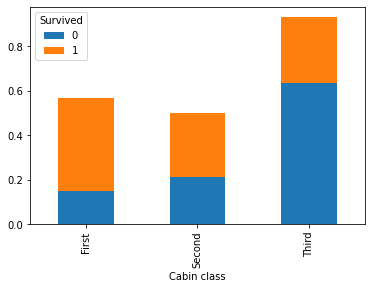

In [40]:
## Do a stacked plot

ct_deaths.plot (kind='bar', stacked=True);

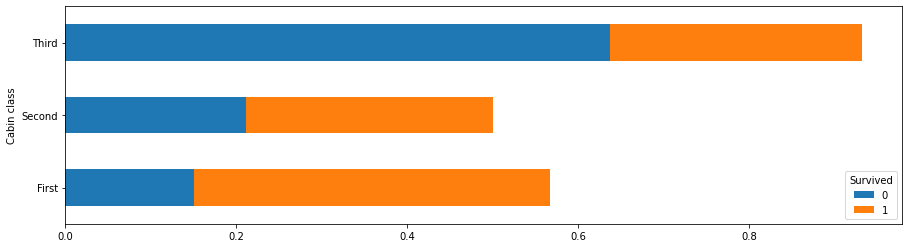

In [42]:
## Do same chart, but horizontal bars
ct_deaths.plot (kind='barh', stacked=True, figsize=(15,4));

In [43]:
## Compare categorical and continuous vars
df['Age'].mean()

29.64209269662921

In [50]:
## continuous var now broken by a categorical vars
df_age = df.groupby('Cabin class')['Age'].mean();

df_age

Cabin class
First     38.105543
Second    29.877630
Third     25.140620
Name: Age, dtype: float64

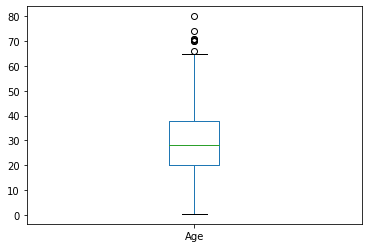

In [52]:
## Visualize single continous var
df['Age'].plot(kind='box');

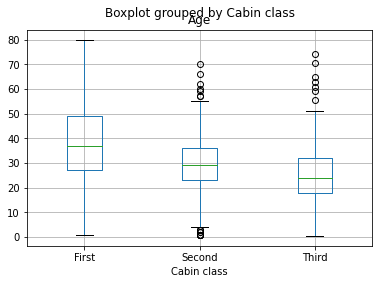

In [57]:
## Breakout continous var by categorical var
df.boxplot (column='Age', by='Cabin class');

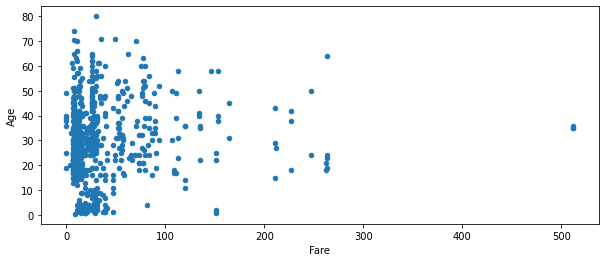

In [62]:
## Compare 2 or 3 continous vars

df.plot (kind='scatter', x= 'Age', y='Fare', figsize=(10,4));

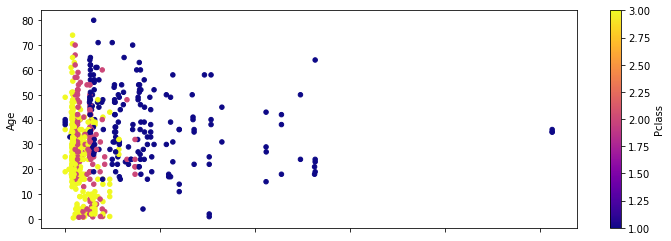

In [67]:
## use 3 vars

df.plot (kind='scatter', y='Age', x='Fare', c='Pclass', colormap='plasma', figsize=(12,4));

In [68]:
## compare multiple continuous vars
corr_matrix = df.corr()

corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356462,-0.082446,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.552893
Age,-0.082446,-0.365902,1.000000,0.093143
Fare,0.266100,-0.552893,0.093143,1.000000


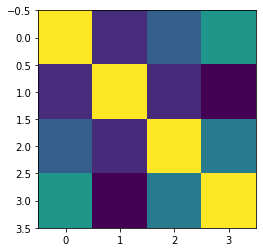

In [70]:
## display corr_matrix as heatmap

plt.imshow(corr_matrix);

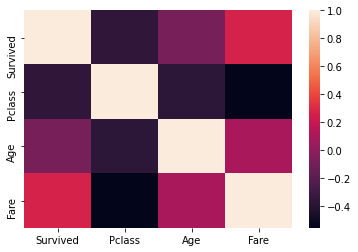

In [71]:
## use seaborn heat map
sns.heatmap(corr_matrix);

In [25]:
### Will chose the dataset favorability polls for  Presidential-candidate-favorables-2019 from FiveThirtyEight blog

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/presidential-candidate-favorables-2019/favorability_polls_rv_2019.csv'
df_polls = pd.read_csv (url)
df_polls.head(20)

,question_id,start_date,end_date,pollster_id,pollster,sponsors,sample_size,population,methodology,url,politician,favorable,unfavorable,very_favorable,somewhat_favorable,somewhat_unfavorable,very_unfavorable
0,114577,2019-12-07,2019-12-10,568,YouGov,Economist,1195,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Michael F. Bennet,14.0,29.0,4.0,10.0,12.0,17.0
1,114585,2019-12-07,2019-12-10,568,YouGov,Economist,1198,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Michael Bloomberg,24.0,58.0,7.0,17.0,20.0,38.0
2,114589,2019-12-07,2019-12-10,568,YouGov,Economist,1198,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Cory A. Booker,35.0,45.0,11.0,24.0,12.0,33.0
3,114593,2019-12-07,2019-12-10,568,YouGov,Economist,1198,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Steve Bullock,14.0,27.0,3.0,11.0,11.0,16.0
4,114597,2019-12-07,2019-12-10,568,YouGov,Economist,1202,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Pete Buttigieg,35.0,44.0,14.0,21.0,13.0,31.0
5,114601,2019-12-07,2019-12-10,568,YouGov,Economist,1197,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Julián Castro,28.0,45.0,6.0,22.0,15.0,30.0
6,114605,2019-12-07,2019-12-10,568,YouGov,Economist,1198,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,John K. Delaney,11.0,31.0,3.0,8.0,13.0,18.0
7,114609,2019-12-07,2019-12-10,568,YouGov,Economist,1202,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Tulsi Gabbard,25.0,45.0,6.0,19.0,21.0,24.0
8,114613,2019-12-07,2019-12-10,568,YouGov,Economist,1202,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Amy Klobuchar,29.0,40.0,8.0,21.0,14.0,26.0
9,114617,2019-12-07,2019-12-10,568,YouGov,Economist,1197,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Deval Patrick,14.0,31.0,4.0,10.0,11.0,20.0


In [0]:
df_polls['overall_favor'] = df_polls['favorable'] + df_polls['somewhat_favorable'] + df_polls['very_favorable']

In [39]:
df_polls.shape

(1631, 18)

In [40]:
## do a crosstab of Trump over time

df_trump = df_polls[df_polls['politician'] =='Donald Trump']

df_trump.shape


(135, 18)

In [41]:
df_trump

,question_id,start_date,end_date,pollster_id,pollster,sponsors,sample_size,population,methodology,url,politician,favorable,unfavorable,very_favorable,somewhat_favorable,somewhat_unfavorable,very_unfavorable,overall_favor
16,114836,2019-12-07,2019-12-10,568,YouGov,Economist,1203,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Donald Trump,45.0,54.0,12.0,6.0,48.0,NaN,63.0
23,114733,2019-12-04,2019-12-09,396,Quinnipiac University,NaN,1553,rv,Live Phone,https://poll.qu.edu/national/release-detail?Re...,Donald Trump,40.0,57.0,NaN,NaN,NaN,NaN,NaN
30,114673,2019-12-04,2019-12-08,320,Monmouth University,NaN,838,rv,Live Phone,https://www.monmouth.edu/polling-institute/doc...,Donald Trump,46.0,52.0,33.0,13.0,5.0,47.0,92.0
48,114750,2019-12-01,2019-12-03,568,YouGov,Economist,1198,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Donald Trump,47.0,52.0,34.0,13.0,5.0,47.0,94.0
54,114655,2019-11-27,2019-11-29,1508,Harris Poll,Harvard,1859,rv,Online,https://harvardharrispoll.com/wp-content/uploa...,Donald Trump,42.0,54.0,24.0,18.0,11.0,43.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,114796,2019-01-12,2019-01-15,568,YouGov,Economist,1283,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Donald Trump,44.0,54.0,32.0,12.0,6.0,48.0,88.0
1600,114721,2019-01-11,2019-01-14,1189,Morning Consult,Politico,1984,rv,Online,https://morningconsult.com/2019/01/17/polling-...,Donald Trump,41.0,53.0,NaN,NaN,NaN,NaN,NaN
1608,114734,2019-01-09,2019-01-13,396,Quinnipiac University,NaN,1209,rv,Live Phone,https://poll.qu.edu/national/release-detail?Re...,Donald Trump,41.0,56.0,NaN,NaN,NaN,NaN,NaN
1609,114797,2019-01-06,2019-01-08,568,YouGov,Economist,1295,rv,Online,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Donald Trump,44.0,54.0,30.0,14.0,5.0,49.0,88.0


In [42]:
ct_trump = pd.crosstab (df_polls['end_date'], df_polls['overall_favor'] )

ct_trump

overall_favor,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,32.0,34.0,36.0,37.0,37.2,38.0,39.0,40.0,42.0,44.0,46.0,48.0,50.0,50.6,51.0,52.0,53.0,53.4,54.0,55.4,56.0,57.0,58.0,60.0,61.0,62.0,63.0,64.0,65.0,...,67.2,68.0,69.0,70.0,72.0,72.4,74.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,84.4,85.0,86.0,88.0,88.4,89.0,90.0,90.6,92.0,93.0,94.0,95.0,96.0,98.0,99.0,100.0,101.0,102.0,104.0,106.0,107.0,108.0,110.0,112.0
end_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2019-01-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-16,0,0,0,0,0,0,0,0,2,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2019-01-22,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0,0,0,0,0,0,0,1,0,0,0,1,2,2,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-11-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-03,0,0,0,0,0,1,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


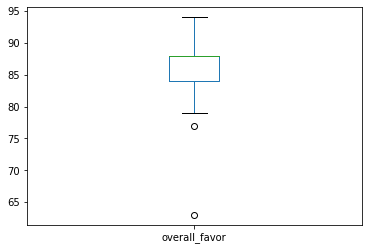

In [44]:
df_trump['overall_favor'].plot(kind='box');

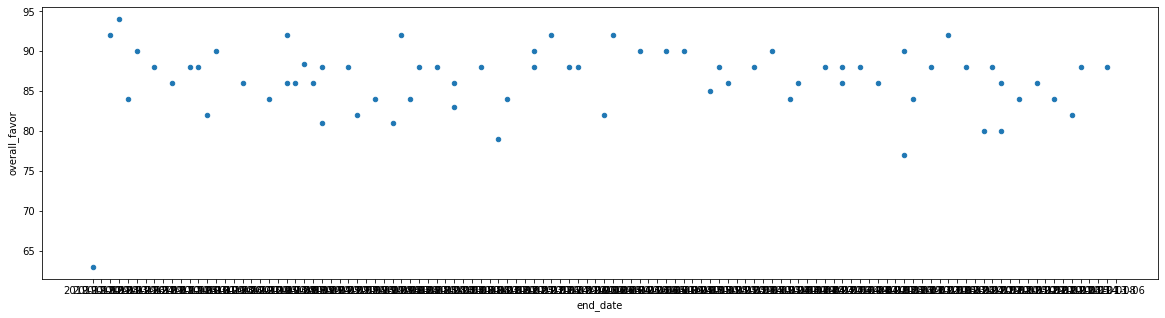

In [46]:
df_trump.plot (kind='scatter', y='overall_favor', x='end_date', figsize=(20,5));

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here